In [3]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# import nodes-values-relation tags

In [50]:
JSON_folder = "json_data/ncn_japan/"

with open(JSON_folder + 'nodes.json') as f:
    data = json.load(f)

# Normalize the JSON structure
df_nodes = pd.json_normalize(data)

with open(JSON_folder + 'ways.json') as f:
    data = json.load(f)
df_ways = pd.json_normalize(data)

with open(JSON_folder + 'relations.json') as f:
    data = json.load(f)
df_relation = pd.json_normalize(data)

# Extract the id, lat, lon, and expand the tags dictionary
#df_expanded = pd.json_normalize(data, 'tags', ['id', 'lat', 'lon'], sep='_')

In [51]:
df_nodes.columns = df_nodes.columns.str.replace('tags.', '', regex=False)
df_ways.columns = df_ways.columns.str.replace('tags.', '', regex=False)
df_relation.columns = df_relation.columns.str.replace('tags.', '', regex=False)

# Tags NAN frequency

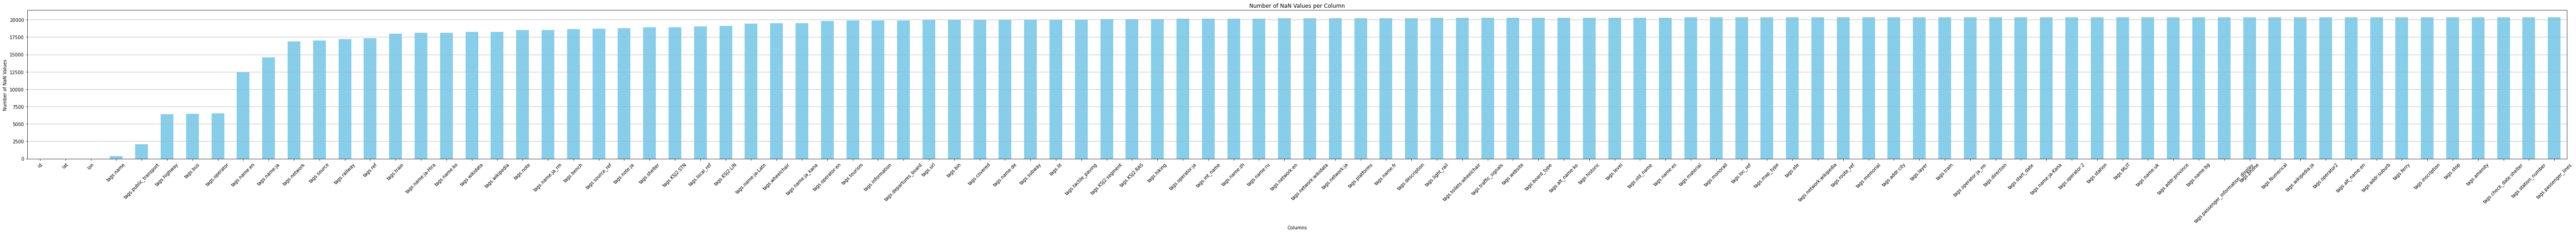

In [14]:
nan_count_nodes = df_nodes.isna().sum().sort_values()

plt.figure(figsize=(100, 6))
nan_count_nodes[0:100].plot(kind='bar', color='skyblue')

plt.title('Number of NaN Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')
plt.xticks(rotation=45)
plt.grid(axis='y')

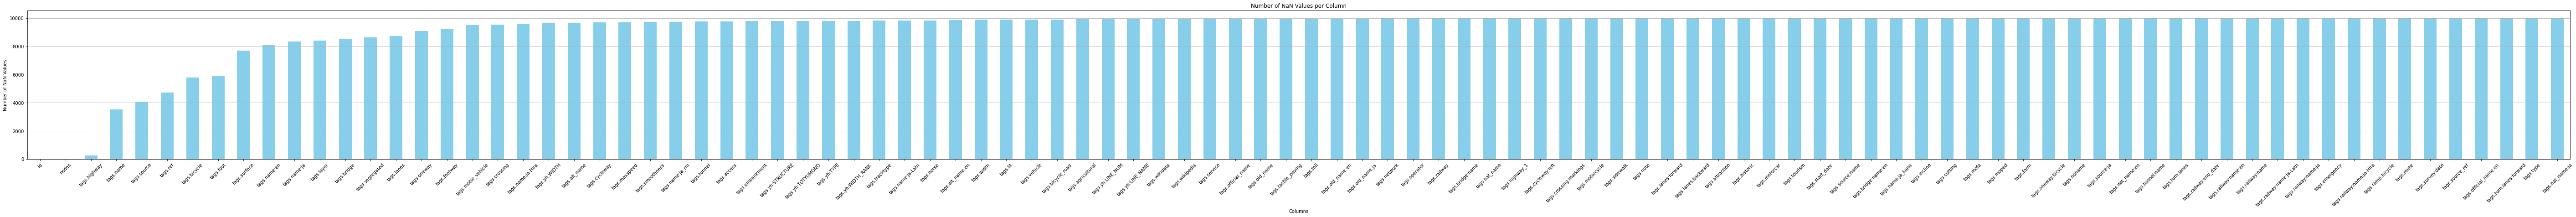

In [17]:
nan_count_ways = df_ways.isna().sum().sort_values()

plt.figure(figsize=(100, 6))
nan_count_ways[0:100].plot(kind='bar', color='skyblue')

plt.title('Number of NaN Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Tags NAN frequency, for a specific tag=value

In [20]:
df_ways["tags.bicycle"].value_counts()

tags.bicycle
designated    3406
yes            828
no              14
dismount        12
Name: count, dtype: int64

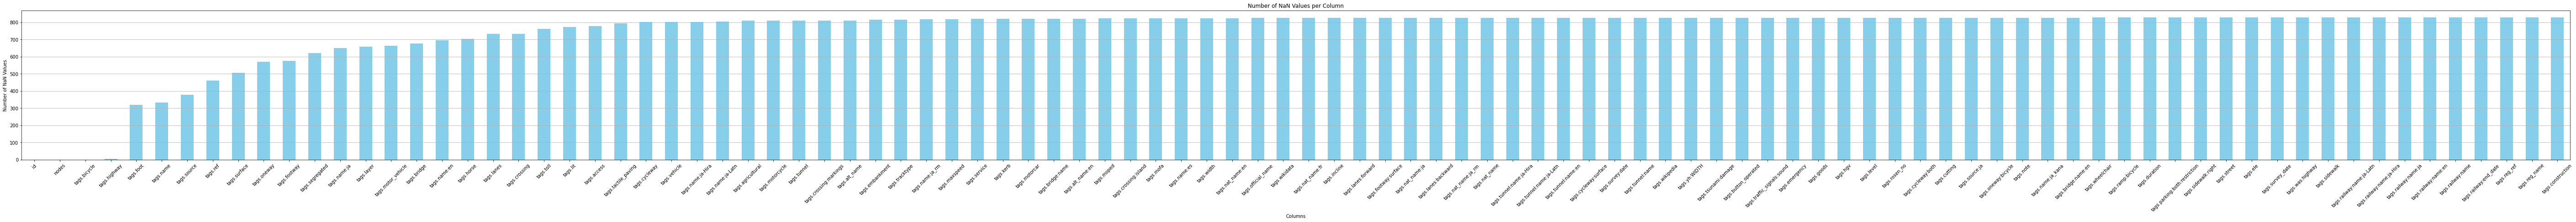

In [26]:
bicycle_tags = df_ways[df_ways["tags.bicycle"] == "yes"]
bicycle_count = bicycle_tags.isna().sum().sort_values()

plt.figure(figsize=(100, 6))
bicycle_count[0:100].plot(kind='bar', color='skyblue')

plt.title('Number of NaN Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Tags extraction

In [74]:
#df_ways.nunique()

In [67]:
tags_list = df_ways.columns[2:]tags_values = {}

tags_values = {}
for tag in tags_list:
    values = df_ways[tag].dropna().unique().tolist()
    if len(values) < 10 :
        tags_values[tag] = values

In [68]:
tags_values

{'source:name': ['YahooJapan/ALPSMAP', 'survey', 'YahooJapan/ALPSMAP;survey'],
 'lanes': ['1', '2', '3', '4', '5', '6'],
 'oneway:bicycle': ['no', 'yes'],
 'oneway:motor_vehicle:conditional': ['yes @ (07:30-09:00)'],
 'bridge': ['yes', 'aqueduct', 'viaduct', 'no', 'movable'],
 'layer': ['1', '-1', '2', '-3', '-2'],
 'maxspeed': ['60', '50', '40', '30', '20'],
 'oneway': ['yes', 'no'],
 'embankment': ['yes', 'dyke', 'right'],
 'was:highway': ['primary'],
 'was:name': ['長野上田線'],
 'bicycle': ['designated', 'yes', 'no', 'dismount'],
 'foot': ['designated', 'yes', 'no', 'destination'],
 'segregated': ['no', 'yes'],
 'lit': ['yes', 'no'],
 'tunnel': ['yes', 'culvert', 'no'],
 'smoothness': ['good', 'intermediate', 'excellent', 'bad'],
 'nat_name:en': ['National Highway Route 32',
  'National Highway Route 1',
  'National Highway Route 369',
  'National Highway Route 356',
  'National Highway Route 42',
  'National Highway Route 8',
  'National Highway Route 359',
  'National Highway Route 24